In [71]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [72]:
import numpy as np
from numpy import array
import graphviz
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11
df.head()

,x,y,Magicv2,localization4,localizationlab,Magicv2_5g,localization3,localization_lab5g,localization1,localization4_5g,localization2,localization3_5g,localization1_5g,Average
0,5.0,-11.75,-56,-45,-66,-66,-41,-79,-76,-73,-75,-61,-90,-66.181818
1,5.0,-11.75,-56,-45,-63,-65,-41,-78,-73,-68,-75,-63,-95,-65.636364
2,5.0,-11.75,-55,-48,-59,-67,-42,-78,-73,-67,-73,-59,-93,-64.909091
3,5.0,-11.75,-55,-48,-59,-70,-43,-78,-73,-68,-73,-56,-95,-65.272727
4,5.0,-11.75,-55,-46,-63,-70,-39,-80,-73,-70,-73,-57,-95,-65.545455


In [74]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( min_samples_split = 10, min_samples_leaf = 2, max_features = "auto", max_depth = 100)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [77]:
y_pred = regressor.predict(X_test)

In [78]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.090909
497,-74.181818,-74.090909
498,-74.090909,-74.090909
499,-74.181818,-74.090909
500,-75.000000,-74.571429
...,...,...
615,-70.363636,-74.571429
616,-70.181818,-74.571429
617,-70.454545,-74.571429
618,-70.363636,-74.571429


In [79]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9154273146208625
Mean Squared Error: 5.102825981098916
Root Mean Squared Error: 2.2589435542082312


In [80]:
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_0 <= 13.62
|   |--- feature_5 <= -77.00
|   |   |--- feature_8 <= -91.00
|   |   |   |--- feature_10 <= -72.00
|   |   |   |   |--- value: [-72.84]
|   |   |   |--- feature_10 >  -72.00
|   |   |   |   |--- feature_6 <= -35.00
|   |   |   |   |   |--- value: [-71.48]
|   |   |   |   |--- feature_6 >  -35.00
|   |   |   |   |   |--- feature_0 <= 8.87
|   |   |   |   |   |   |--- feature_2 <= -61.50
|   |   |   |   |   |   |   |--- value: [-71.01]
|   |   |   |   |   |   |--- feature_2 >  -61.50
|   |   |   |   |   |   |   |--- value: [-70.55]
|   |   |   |   |   |--- feature_0 >  8.87
|   |   |   |   |   |   |--- value: [-70.07]
|   |   |--- feature_8 >  -91.00
|   |   |   |--- feature_5 <= -84.50
|   |   |   |   |--- feature_4 <= -63.50
|   |   |   |   |   |--- feature_10 <= -79.00
|   |   |   |   |   |   |--- feature_10 <= -91.50
|   |   |   |   |   |   |   |--- value: [-72.41]
|   |   |   |   |   |   |--- feature_10 >  -91.50
|   |   |   |   |   |   |   |--- value: [-70.

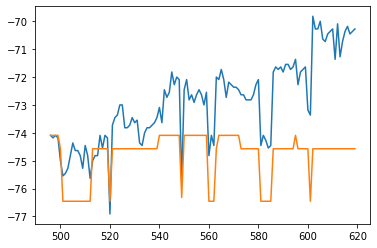

In [81]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()

In [104]:
regressor = DecisionTreeRegressor(max_depth = 5)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [105]:
y_pred = regressor.predict(X)
y_pred

array([-65.90909091, -65.90909091, -64.72727273, -65.38961039,
       -65.38961039, -65.38961039, -65.38961039, -64.72727273,
       -64.72727273, -64.72727273, -66.71428571, -67.25619835,
       -65.38961039, -63.77272727, -63.77272727, -63.27272727,
       -63.27272727, -63.27272727, -63.27272727, -63.27272727,
       -66.71428571, -66.71428571, -66.71428571, -67.25619835,
       -67.25619835, -66.71428571, -66.71428571, -66.71428571,
       -66.71428571, -66.71428571, -65.38961039, -65.38961039,
       -66.71428571, -66.71428571, -66.71428571, -66.71428571,
       -66.71428571, -67.25619835, -67.25619835, -67.25619835,
       -67.67676768, -67.67676768, -67.67676768, -67.67676768,
       -67.67676768, -67.67676768, -67.25619835, -67.25619835,
       -67.25619835, -67.67676768, -69.2020202 , -69.2020202 ,
       -68.24644031, -68.24644031, -69.2020202 , -69.2020202 ,
       -67.25619835, -67.67676768, -67.25619835, -67.67676768,
       -68.24644031, -68.24644031, -68.24644031, -68.24

In [106]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

0.5461963123103631

In [107]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})
df

,Actual,Predicted
0,-66.181818,-65.909091
1,-65.636364,-65.909091
2,-64.909091,-64.727273
3,-65.272727,-65.389610
4,-65.545455,-65.389610
...,...,...
615,-70.363636,-70.439394
616,-70.181818,-70.439394
617,-70.454545,-70.439394
618,-70.363636,-70.439394


In [108]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 0.40178038217082607
Mean Squared Error: 0.2983304115814398
Root Mean Squared Error: 0.5461963123103631


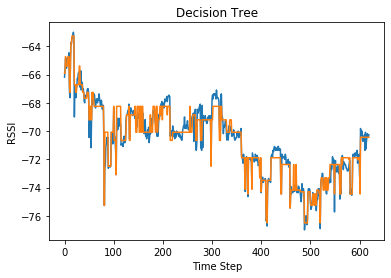

In [110]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.title('Decision Tree')
plt.xlabel('Time Step')
plt.ylabel('RSSI')
plt.show()